In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eb22af05-4da1-463e-a74e-5a4d1c20637e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-08-16T19:10:08.750Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9496}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12285, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
import pandas as pd
pd.set_option('display.max.columns',None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12285,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990729e+07,1.990729e+07,False,NaN,1,NaN,NaN,None,2025-08-16T19:08:00.000Z,117751.856161,5.179270e+10,-29.7299,-0.049410,0.488689,0.903991,-1.743982,12.487392,12.592879,2.344120e+12,58.9835,2.472789e+12,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
1,1027,Ethereum,ETH,ethereum,10441,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207079e+08,1.207079e+08,True,NaN,2,NaN,NaN,None,2025-08-16T19:09:00.000Z,4414.730066,3.320058e+10,-37.6545,0.073483,0.656583,3.879900,28.282503,76.316095,79.168549,5.328929e+11,13.4088,5.328929e+11,None,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.941850e+10,9.998584e+10,False,NaN,3,NaN,NaN,None,2025-08-16T19:09:00.000Z,3.102481,4.606003e+09,-36.4397,0.122387,1.203107,-5.647641,-7.693415,42.265264,29.138967,1.843448e+11,4.6385,3.102481e+11,None,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
3,825,Tether USDt,USDT,tether,141660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.663934e+11,1.687492e+11,True,NaN,4,NaN,NaN,None,2025-08-16T19:08:00.000Z,1.000605,8.733595e+10,-37.8362,-0.004180,0.007404,0.044135,0.008389,0.036309,0.043008,1.664940e+11,4.1894,1.688512e+11,None,2025-08-16T19:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-16 22:10:09.862591
4,1839,BNB,BNB,bnb,2664,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392877e+08,1.392877e+08,False,NaN,5,NaN,NaN,None,2025-08-16T19:08:00.000Z,835.309861,2.054177e+09,-51.1976,0.146814,1.792898,3.512528,15.971308,29.162174,29.723765,1.163484e+11,2.9276,1.163484e+11,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
5,5426,Solana,SOL,solana,969,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.399294e+08,6.076172e+08,True,NaN,6,5.252369e+08,9.893770e+10,None,2025-08-16T19:08:00.000Z,188.367764,4.395865e+09,-42.5272,0.211687,2.442354,3.390616,7.577368,26.919284,10.671928,1.017053e+11,2.5591,1.144555e+11,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
6,3408,USDC,USDC,usd-coin,30554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.818853e+10,6.818853e+10,False,NaN,7,6.090122e+10,6.089249e+10,None,2025-08-16T19:09:00.000Z,0.999857,1.175939e+10,-44.2772,-0.007698,-0.004235,-0.004344,-0.003899,-0.006099,0.019762,6.817875e+10,1.7155,6.817875e+10,None,2025-08-16T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-16 22:10:09.862591
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.505449e+11,1.505449e+11,True,NaN,8,NaN,NaN,None,2025-08-16T19:09:00.000Z,0.229514,2.300859e+09,-31.9223,0.233244,3.465559,-6.492515,6.798015,35.596941,0.707233,3.455223e+10,0.8694,3.455223e+10,None,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
8,1958,TRON,TRX,tron,1215,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, la

In [95]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eb22af05-4da1-463e-a74e-5a4d1c20637e',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    #df2['timestamp']= pd.to_datetime('now')
    #df = pd.concat([df2,df2], ignore_index = True)
    df
    if not os.path.isfile(r'C:\Users\Petertimi\Documents\python output\CryptoApi.csv'):
        df.to_csv(r'C:\Users\Petertimi\Documents\python output\CryptoApi.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Petertimi\Documents\python output\CryptoApi.csv',mode = 'a', header=False)
        
        

In [96]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute

{'status': {'timestamp': '2025-08-17T17:58:51.486Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9495}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12285, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [97]:
df72 = pd.read_csv(r'C:\Users\Petertimi\Documents\python output\CryptoApi.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12285,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19907287.00000,19907287.00000,False,NaN,1,NaN,NaN,NaN,2025-08-16T19:08:00.000Z,117751.85616,51792704881.41147,-29.72990,-0.04941,0.48869,0.90399,-1.74398,12.48739,12.59288,2344119995379.34277,58.98350,2472788979380.58008,NaN,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
1,1,1027,Ethereum,ETH,ethereum,10441,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120707912.81182,120707912.81182,True,NaN,2,NaN,NaN,NaN,2025-08-16T19:09:00.000Z,4414.73007,33200579378.50780,-37.65450,0.07348,0.65658,3.87990,28.28250,76.31609,79.16855,532892851868.60040,13.40880,532892851868.59998,NaN,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
2,2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59418500720.00000,99985837887.00000,False,NaN,3,NaN,NaN,NaN,2025-08-16T19:09:00.000Z,3.10248,4606002605.38304,-36.43970,0.12239,1.20311,-5.64764,-7.69341,42.26526,29.13897,184344760683.75247,4.63850,310248085108.12000,NaN,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
3,3,825,Tether USDt,USDT,tether,141660,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,166393375511.26932,168749161109.93979,True,NaN,4,NaN,NaN,NaN,2025-08-16T19:08:00.000Z,1.00060,87335952677.96608,-37.83620,-0.00418,0.00740,0.04413,0.00839,0.03631,0.04301,166494010860.51743,4.18940,168851221247.32001,NaN,2025-08-16T19:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-16 22:10:09.862591
4,4,1839,BNB,BNB,bnb,2664,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139287694.23000,139287694.23000,False,NaN,5,NaN,NaN,NaN,2025-08-16T19:08:00.000Z,835.30986,2054176593.32234,-51.19760,0.14681,1.79290,3.51253,15.97131,29.16217,29.72377,116348384572.55586,2.92760,116348384572.56000,NaN,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,10,32196,Hyperliquid,HYPE,hyperliquid,131,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1000000000.00000,333928180.00000,999993930.00000,False,NaN,11,333931719.00000,15628802872.93056,NaN,2025-08-16T19:09:00.000Z,46.80239,229340952.08705,-60.80130,0.62387,1.56702,6.74079,0.33925,16.94822,77.75404,15628637239.26889,0.39330,46802390979.01000,NaN,2025-08-16T19:09:00.000Z,32196.00000,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-08-16 22:10:09.862591
311,11,1975,Chainlink,LINK,chainlink,2063,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,678099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2025-08-16T19:09:00.000Z,22.59256,875584294.30014,-27.27630,2.57911,5.02063,6.18247,30.94155,72.74429,45.70292,15320015486.09612,0.38550,22592561795.67000,NaN,2025-08-16T19:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-08-16 22:10:09.862591
312,12,512,Stellar,XLM,stellar,740,2014-08-05T00:00:00.000Z,"['medium-of-exchange

In [98]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [99]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12285,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19907287.00000,19907287.00000,False,NaN,1,NaN,NaN,None,2025-08-16T19:08:00.000Z,117751.85616,51792704881.41147,-29.72990,-0.04941,0.48869,0.90399,-1.74398,12.48739,12.59288,2344119995379.34277,58.98350,2472788979380.58008,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
1,1027,Ethereum,ETH,ethereum,10441,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120707912.81182,120707912.81182,True,NaN,2,NaN,NaN,None,2025-08-16T19:09:00.000Z,4414.73007,33200579378.50780,-37.65450,0.07348,0.65658,3.87990,28.28250,76.31609,79.16855,532892851868.60040,13.40880,532892851868.59998,None,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59418500720.00000,99985837887.00000,False,NaN,3,NaN,NaN,None,2025-08-16T19:09:00.000Z,3.10248,4606002605.38304,-36.43970,0.12239,1.20311,-5.64764,-7.69341,42.26526,29.13897,184344760683.75247,4.63850,310248085108.12000,None,2025-08-16T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
3,825,Tether USDt,USDT,tether,141660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,166393375511.26932,168749161109.93979,True,NaN,4,NaN,NaN,None,2025-08-16T19:08:00.000Z,1.00060,87335952677.96608,-37.83620,-0.00418,0.00740,0.04413,0.00839,0.03631,0.04301,166494010860.51743,4.18940,168851221247.32001,None,2025-08-16T19:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-16 22:10:09.862591
4,1839,BNB,BNB,bnb,2664,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287694.23000,139287694.23000,False,NaN,5,NaN,NaN,None,2025-08-16T19:08:00.000Z,835.30986,2054176593.32234,-51.19760,0.14681,1.79290,3.51253,15.97131,29.16217,29.72377,116348384572.55586,2.92760,116348384572.56000,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
5,5426,Solana,SOL,solana,969,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539929421.97772,607617162.19070,True,NaN,6,525236893.30000,98937698995.24191,None,2025-08-16T19:08:00.000Z,188.36776,4395865033.34689,-42.52720,0.21169,2.44235,3.39062,7.57737,26.91928,10.67193,101705297765.12752,2.55910,114455486017.87000,None,2025-08-16T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-16 22:10:09.862591
6,3408,USDC,USDC,usd-coin,30554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,68188525801.45193,68188525801.45193,False,NaN,7,60901219650.23000,60892486780.23863,None,2025-08-16T19:09:00.000Z,0.99986,11759390297.27854,-44.27720,-0.00770,-0.00423,-0.00434,-0.00390,-0.00610,0.01976,68178747975.42238,1.71550,68178747975.42000,None,2025-08-16T19:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-16 22:10:09.862591
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150544896383.70520,150544896383.70520,True,NaN,8,NaN,NaN,None,2025-08-16T19:09:00.000Z,0.22951,2300859421.25824,-31.92230,0.23324,3.46556,-6.49252,6.79801,35.59694,0.70723,34552232233.89841,0

In [100]:
df3 = df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04941,0.48869,0.90399,-1.74398,12.48739,12.59288
Ethereum,0.07348,0.65658,3.87990,28.28250,76.31609,79.16855
XRP,0.12239,1.20311,-5.64764,-7.69341,42.26526,29.13897
Tether USDt,-0.00418,0.00740,0.04413,0.00839,0.03631,0.04301
BNB,0.14681,1.79290,3.51253,15.97131,29.16217,29.72377
Solana,0.21169,2.44235,3.39062,7.57737,26.91928,10.67193
USDC,-0.00770,-0.00423,-0.00434,-0.00390,-0.00610,0.01976
Dogecoin,0.23324,3.46556,-6.49252,6.79801,35.59694,0.70723
TRON,0.16733,-0.70890,3.43836,9.51437,27.15016,31.01461


In [101]:
df4 = df3.stack()
df4
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df4)


name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04941
              quote.USD.percent_change_24h     0.48869
              quote.USD.percent_change_7d      0.90399
              quote.USD.percent_change_30d    -1.74398
              quote.USD.percent_change_60d    12.48739
              quote.USD.percent_change_90d    12.59288
Ethereum      quote.USD.percent_change_1h      0.07348
              quote.USD.percent_change_24h     0.65658
              quote.USD.percent_change_7d      3.87990
              quote.USD.percent_change_30d    28.28250
              quote.USD.percent_change_60d    76.31609
              quote.USD.percent_change_90d    79.16855
XRP           quote.USD.percent_change_1h      0.12239
              quote.USD.percent_change_24h     1.20311
              quote.USD.percent_change_7d     -5.64764
              quote.USD.percent_change_30d    -7.69341
              quote.USD.percent_change_60d    42.26526
              quote.US

In [102]:
type(df4)

pandas.core.series.Series

In [103]:
df5 = df4.to_frame(name ='values')
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df5)


                                             values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.04941
             quote.USD.percent_change_24h   0.48869
             quote.USD.percent_change_7d    0.90399
             quote.USD.percent_change_30d  -1.74398
             quote.USD.percent_change_60d  12.48739
             quote.USD.percent_change_90d  12.59288
Ethereum     quote.USD.percent_change_1h    0.07348
             quote.USD.percent_change_24h   0.65658
             quote.USD.percent_change_7d    3.87990
             quote.USD.percent_change_30d  28.28250
             quote.USD.percent_change_60d  76.31609
             quote.USD.percent_change_90d  79.16855
XRP          quote.USD.percent_change_1h    0.12239
             quote.USD.percent_change_24h   1.20311
             quote.USD.percent_change_7d   -5.64764
             quote.USD.percent_change_30d  -7.69341
             quote.USD.percent_change_60d  42.26526
            

In [104]:
df5.count()

values    90
dtype: int64

In [105]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04941
1,Bitcoin,quote.USD.percent_change_24h,0.48869
2,Bitcoin,quote.USD.percent_change_7d,0.90399
3,Bitcoin,quote.USD.percent_change_30d,-1.74398
4,Bitcoin,quote.USD.percent_change_60d,12.48739
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.18505
86,Bitcoin Cash,quote.USD.percent_change_7d,1.62859
87,Bitcoin Cash,quote.USD.percent_change_30d,16.88164
88,Bitcoin Cash,quote.USD.percent_change_60d,24.14762


In [106]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04941
1,Bitcoin,quote.USD.percent_change_24h,0.48869
2,Bitcoin,quote.USD.percent_change_7d,0.90399
3,Bitcoin,quote.USD.percent_change_30d,-1.74398
4,Bitcoin,quote.USD.percent_change_60d,12.48739
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.18505
86,Bitcoin Cash,quote.USD.percent_change_7d,1.62859
87,Bitcoin Cash,quote.USD.percent_change_30d,16.88164
88,Bitcoin Cash,quote.USD.percent_change_60d,24.14762


In [107]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,-0.04941
1,Bitcoin,24h,0.48869
2,Bitcoin,7d,0.90399
3,Bitcoin,30d,-1.74398
4,Bitcoin,60d,12.48739
...,...,...,...
85,Bitcoin Cash,24h,-1.18505
86,Bitcoin Cash,7d,1.62859
87,Bitcoin Cash,30d,16.88164
88,Bitcoin Cash,60d,24.14762


In [108]:
import seaborn as sns
import matplotlib.pyplot as  plt

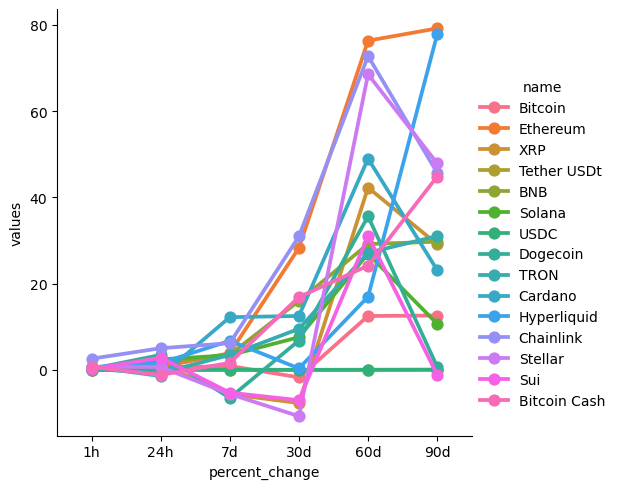

In [109]:
sns.catplot(x='percent_change', y= 'values', hue = 'name', data = df7, kind = 'point')

In [116]:

df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8



,name,quote.USD.price,timestamp
0,Bitcoin,117751.85616,2025-08-16 22:10:09.862591


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

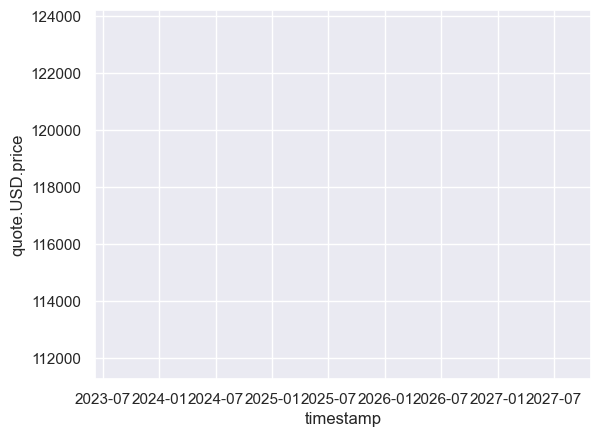

In [114]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)